# Week 2 Data Explortation Assignment
## Abigail Adams
I will be conducting data exploration on the 'Homelessness Count by Age' dataset. This dataset gives information on the number of people experiencing homelessness in each county in California, seperated by age group.    

### Import Packages 
First, I am importing the 'pandas' and 'geopandas' packages because I will use them to ......

In [31]:
# import the packages needed for this assignment
import pandas as pd
import geopandas as gpd

Next, I am importing the dataset that I will be using. I am telling python to: 
*  ca = name this file 'ca' 
*  pd. = use the pandas package
*  read_csv() = call in the .csv file 
* "data_wk2/ca_homelessnessCount_byAge.csv" = the file is located in the 'data_wk2' folder and titled "ca_homelessnessCount_byAge.csv" 

In [51]:
# import the dataset I am exploring 
ca = pd.read_csv("data_wk2/ca_homelessnessCount_byAge.csv")

In [50]:
# check if the file was imported by seeing if it printed 
print(ca.head())

   _id  CALENDAR_YEAR LOCATION_ID    LOCATION AGE_GROUP_PUBLIC  \
0    1           2017         All  California            18-24   
1    2           2017         All  California            25-34   
2    3           2017         All  California            35-44   
3    4           2017         All  California            45-54   
4    5           2017         All  California            55-64   

  EXPERIENCING_HOMELESSNESS_CNT  
0                         16281  
1                         27977  
2                         25195  
3                         26820  
4                         23401  


_id   CALENDAR_YEAR  LOCATION_ID  LOCATION                           AGE_GROUP_PUBLIC  EXPERIENCING_HOMELESSNESS_CNT
2960  2024           CA-612       Glendale CoC (Los Angeles County)  65+               64                               1
2959  2024           CA-612       Glendale CoC (Los Angeles County)  55-64             94                               1
2958  2024           CA-612       Glendale CoC (Los Angeles County)  45-54             71                               1
2957  2024           CA-612       Glendale CoC (Los Angeles County)  35-44             78                               1
2956  2024           CA-612       Glendale CoC (Los Angeles County)  25-34             80                               1
                                                                                                                       ..
5     2017           All          California                         55-64             23401                            1
4     2017           All     

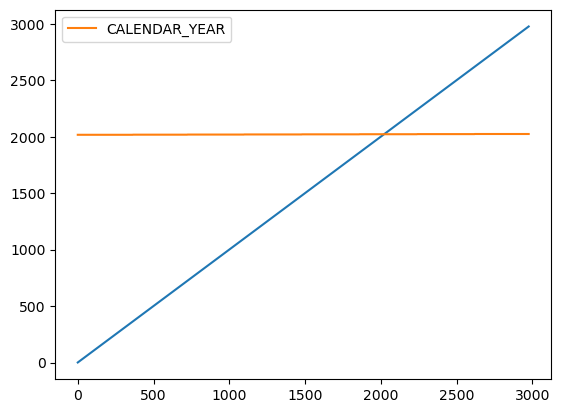

In [53]:
# what am i doing here and what does the output mean (answer for each of these)
ca.shape
ca.info
ca.head()
ca.plot()
ca.value_counts()